# All Campuses & Years - Model

**Model used: Random Forest Classifier**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

**Index**

1. [Environment](#Environment)
2. [Feature Preprocessing ](#FeaturePreprocessing )
3. [Model](#Model)
    - Gridsearch
    - Random Forest Classifier (with best params)
    - Feature Importance
    - Tree Visualization


4. [Conclusions](#Conclusions)

## Environment

#### import libraries

In [33]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Maths
import math
from scipy import stats

#Transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

#### import data

In [34]:
apps_trans = pd.read_csv("apps_allYears_clean_selCols_addCols.csv")

In [35]:
apps_trans.shape

(28723, 17)

In [36]:
apps_trans.head()

Bootcamp Course Bootcamp Format  Bootcamp Year Campus - Timezone  Drop  \
0              WD              FT           2018               MEX     0   
1              UX              FT           2018               AMS     0   
2              UX              FT           2018               BCN     0   
3              WD              FT           2020               MIA     0   
4              WD              PT           2018               MIA     0   

     Drop Reason how did you hear about us? Person Account: Gender  \
0  Not specified               Social Media                   Male   
1  Not specified                     google                   Male   
2  Not specified                     google                   Male   
3  Not specified               Social Media                 Female   
4  Not specified                      other                   Male   

   Stage Duration  Paid Deposit  Scholarship  Discount  \
0          1125.0             0            0         0   
1           875.0             0            0         0   
2           952.0             0            0         0   
3           147.0             0            0         0   
4          1125.0             0            0         1   

   Time Conversion - days  Time between Created Date and Start Date - days  \
0                     110                                              133   
1                      39                                               97   
2                     143                                              227   
3                       0                                               34   
4                     388                                              421   

   Discount(%)  Creater Month  Creater Quarter  
0         0.00              9                3  
1         0.00              7                3  
2         0.00              1                1  
3         0.00              7                3  
4         0.09              9                3

## Feature Engineering 

In [37]:
features_to_encode = apps_trans.columns[apps_trans.dtypes==object].tolist()

In [38]:
col_transformer_e = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), features_to_encode),remainder="passthrough")

## Model: Random Forest Classifier

### Gridsearch

In [40]:
def gridsearch(X,y):
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 2, stop = 30, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create Params
    param_grid = {
    'randomforestclassifier__bootstrap': bootstrap,
    'randomforestclassifier__max_features': max_features,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__n_estimators': n_estimators
    }
    
    # Create a based model
    rf_classifier = RandomForestClassifier()

    # Create a pipeline
    pipe = make_pipeline(col_transformer_e, TomekLinks(sampling_strategy='majority'), rf_classifier)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    grid_search.fit(X, y)
    
    return grid_search.best_estimator_

In [41]:
X = apps_trans.drop(['Paid Deposit'],axis=1)
y = apps_trans['Paid Deposit']
best_model= gridsearch(X,y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 112.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 223.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 293.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 379.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 488.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 624.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 874.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 1105.7min finished


In [42]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Bootcamp Course',
                                                   'Bootcamp Format',
                                                   'Campus - Timezone',
                                                   'Drop Reason',
                                                   'how did you hear about us?',
                                                   'Person Account: '
                                                   'Gender'])])),
                ('tomeklinks', TomekLinks(sampling_strategy='majority')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_features='sqrt',
                                        min_samples_lea

### Random Forest Classifier
Using its best params that we got from Gridsearch

In [43]:
def rfc_report(X, y, model, target_names = ['Not Paid Deposit', 'Paid Deposit']):
    results = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    

    cv = cross_val_score(model, X, y, cv=StratifiedKFold(), scoring = "accuracy")
    
    clf = model.fit(X, y)
    y_pred=clf.predict(X)
        
    print("Classification Report")
    print(classification_report(y, y_pred, target_names=target_names))
    print("Confusion_matrix \n",confusion_matrix(y, y_pred),"\n")
        
    results.append(cv)
    
    final_df = pd.DataFrame(cv)
    final_df.rename(columns={0:'Cross Validaton Score'},inplace=True)
    
    print(final_df)

In [44]:
X = apps_trans.drop(['Paid Deposit'],axis=1)
y = apps_trans['Paid Deposit']
rfc_report(X, y, best_model)

Classification Report
                  precision    recall  f1-score   support

Not Paid Deposit       0.92      0.99      0.95     23556
    Paid Deposit       0.92      0.60      0.72      5167

        accuracy                           0.92     28723
       macro avg       0.92      0.79      0.84     28723
    weighted avg       0.92      0.92      0.91     28723

Confusion_matrix 
 [[23291   265]
 [ 2088  3079]] 

   Cross Validaton Score
0               0.879199
1               0.865970
2               0.877633
3               0.881093
4               0.862987


**Interpretation**

- **The Classification Report:**
    - **Accuracy** tells you what percentage of the predictions are correct.
    - **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
    - **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
    - **F1-score** seeks a balance between precision and recall.


- **Confusion_matrix**
    - T0 (True Not Paid Deposit): 23291 
    - F0 (False Not Paid Deposit): 265
    - T1 (True Paid Deposit): 3079
    - F1 (False Paid Deposit): 2088


- **Cross Validaton Score**

    It is the technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

### FeatureImportance

In [45]:
def rf_feature_importance(model):
    
    rf=best_model.steps[2][1]
    
    ct=best_model.steps[0][1]
    ct_cols=ct.get_feature_names()
    
    importances = pd.DataFrame({'feature':ct.get_feature_names(),'importance':np.round(rf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    
    top20=importances[:20]

    top20.plot.barh()
    plt.title('Top20 RF Feature Importance')

    plt.show()

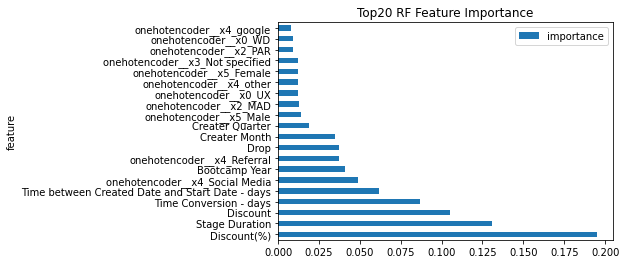

In [46]:
rf_feature_importance(best_model)

#### TreeVisualization 

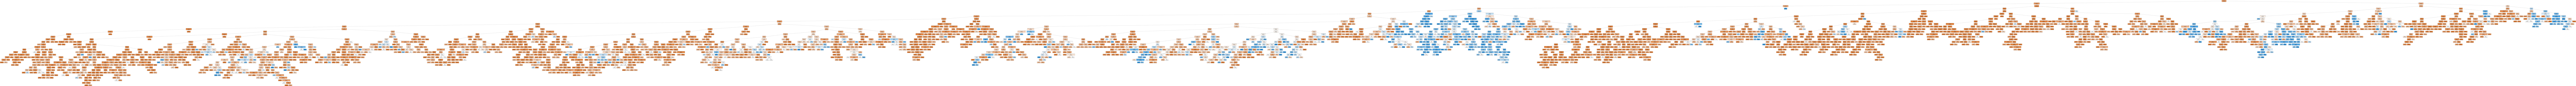

In [51]:
# Extract single tree
feature_names = best_model.steps[0][1].get_feature_names()
target_names = ['Not Paid Deposit', 'Paid Deposit']
estimator = best_model.steps[2][1].estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'ACY_M_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'ACY_M_tree.png')

It is definetly hard to see this tree as it has +20 layers. It is kep in a png in case you want to look at it.